# Solutions to Exercise 2 

This notebook contains solutions to [Exercise 2](../Exercise%202.ipynb).

<br><br><br><br>

## a) Median Home Value by Census Tract in Multnomah County, Oregon

In [1]:
# Step 1: import the modules you need

import censusdis.data as ced

from censusdis.datasets import ACS5

import censusdis.states as states
from censusdis.counties.oregon import MULTNOMAH

import censusdis.maps as cem

from matplotlib.ticker import FuncFormatter

In [2]:
# Step 2: Define a constant for the median home value variable

MEDIAN_HOME_VALUE = 'B25077_001E'

In [3]:
# Step 3: Make the query

gdf_multnomah_tracts = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', MEDIAN_HOME_VALUE],

    state=states.OR,
    county=MULTNOMAH,
    tract='*',
    
    with_geometry=True,
)

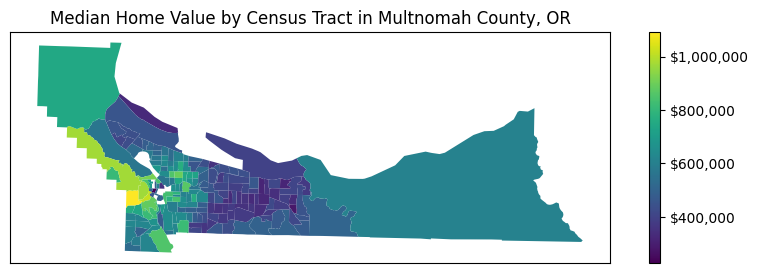

In [4]:
# Step 4: Plot the map
ax = cem.plot_map(
    gdf_multnomah_tracts,
    MEDIAN_HOME_VALUE,

    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},
    
    figsize=(10, 3),
)

ax.set_title("Median Home Value by Census Tract in Multnomah County, OR")
None

## b) Median Home Value of Places in Oregon

In [5]:
# Step 1: Make the query

gdf_places = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME', MEDIAN_HOME_VALUE],

    state=states.OR,
    place='*',
    
    with_geometry=True,
)

In [6]:
# Step 2: Get the geometry of the state

gdf_or = ced.download(
    dataset=ACS5,
    vintage=2022,
    download_variables=['NAME'],

    state=states.OR,
    
    with_geometry=True,
)

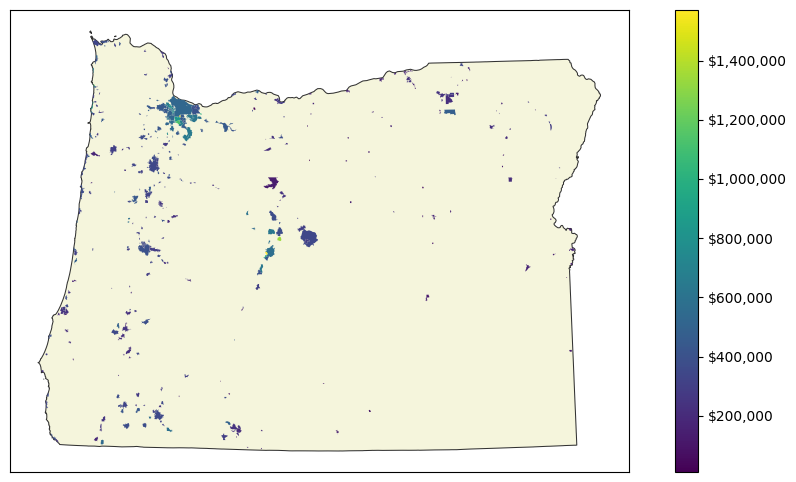

In [7]:
# Step 3: Plot the state map and the places on top.

ax = cem.plot_map(
    gdf_or, linewidth=0.75, color='beige', edgecolor='#333', figsize=(12, 6)
)

ax = cem.plot_map(
    gdf_places,
    MEDIAN_HOME_VALUE,

    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},

    ax=ax
)

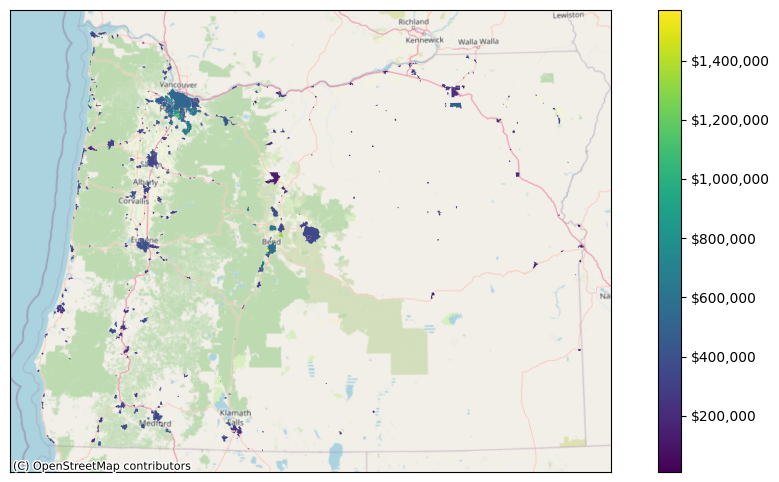

In [8]:
# Alternate version of step 3, with background map.

ax = cem.plot_map(
    gdf_places,
    MEDIAN_HOME_VALUE,

    legend=True,
    legend_kwds={"format": FuncFormatter(lambda x, pos: f"${x:,.0f}")},

    with_background=True,
    
    figsize=(12, 6)
)